<a href="https://www.kaggle.com/code/pranayrishith16/fashion-mnist-lenet5-90?scriptVersionId=134722507" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [37]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AvgPool2D, MaxPool2D, Input, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau

In [39]:
random.set_seed(44)
fashion = ['T-shirt/top',' Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [40]:
data = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'T-shirt/top')

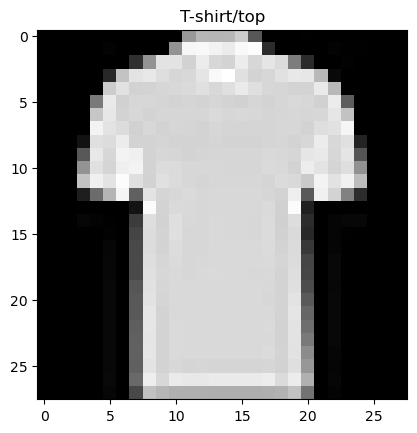

In [41]:
plt.imshow(data.iloc[12560][1:].values.reshape(28,28),cmap='gray')
plt.title(fashion[data.iloc[12560][0]])

In [42]:
y = data['label']
X = data.drop('label',axis=1)
X.shape,y.shape

((60000, 784), (60000,))

In [43]:
X = X/255.
X = X.values.reshape(-1,28,28,1)
y = to_categorical(y,num_classes=10)

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((42000, 28, 28, 1), (18000, 28, 28, 1), (42000, 10), (18000, 10))

In [45]:
def LeNet5():
    inputs = Input(shape=(28,28,1))
    x = Conv2D(6,(5,5),activation='tanh',padding='same')(inputs)
    x = AvgPool2D()(x)
    x = Conv2D(16,(5,5),activation='tanh')(x)
    x = AvgPool2D()(x)
    x = Conv2D(120,(5,5),activation='tanh')(x)
    x = Flatten()(x)
    x = Dense(84,activation='tanh')(x)
    x = Dense(10,activation='softmax')(x)
    
    model = Model(inputs=inputs,outputs=x)
    
    return model

In [46]:
dataAug = ImageDataGenerator(
    rescale=1/255.,
    horizontal_flip=True,
)

In [47]:
model = LeNet5()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_4 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_5 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 120)         4812

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='SGD',metrics=['accuracy'])

# history = model.fit(X_train,y = y_train, epochs=50, validation_data=(X_test,y_test))
history = model.fit(dataAug.flow(X_train,y_train),epochs=50,validation_data=(X_test,y_test))

Epoch 1/50
1313/1313 [==============================] - 11s 8ms/step - loss: 2.3031 - accuracy: 0.0975 - val_loss: 2.2999 - val_accuracy: 0.2184
Epoch 2/50
1313/1313 [==============================] - 9s 7ms/step - loss: 2.3029 - accuracy: 0.1032 - val_loss: 2.2822 - val_accuracy: 0.1014
Epoch 3/50
1313/1313 [==============================] - 9s 7ms/step - loss: 2.3029 - accuracy: 0.1012 - val_loss: 2.2611 - val_accuracy: 0.1262
Epoch 4/50
1313/1313 [==============================] - 9s 7ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.2469 - val_accuracy: 0.1304
Epoch 5/50
1313/1313 [==============================] - 9s 7ms/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.2290 - val_accuracy: 0.1411
Epoch 6/50
1313/1313 [==============================] - 9s 7ms/step - loss: 2.3024 - accuracy: 0.1028 - val_loss: 2.2102 - val_accuracy: 0.1414
Epoch 7/50
 720/1313 [===============>..............] - ETA: 3s - loss: 2.3022 - accuracy: 0.1065

In [ ]:
test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')
test.head()

In [ ]:
ytest = test['label']
xtest = test.drop('label',axis=1)
xtest = xtest/255.
xtest = xtest.values.reshape(-1,28,28,1)

In [ ]:
ypred = model.predict(xtest)

In [ ]:
y_pred = []
for i in range(len(ypred)):
    y_pred.append(ypred[i].argmax())

In [ ]:
plt.imshow(xtest[563],cmap='gray')
plt.title('actual:{}  predicted:{}'.format(fashion[ytest[563]],fashion[y_pred[563]]))

In [ ]:
print(accuracy_score(ytest,y_pred))
sns.heatmap(confusion_matrix(ytest,y_pred),annot=True,fmt='.0f',cmap='Blues',xticklabels=fashion,yticklabels=fashion)